# Analyse des données : pollution / années
## Projet DALAS
### SOYKOK Aylin - CELIK Simay

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('../data/data_annees.csv')
for column in df.columns:
    if column != 'Country':
        df[column] = pd.to_numeric(df[column], errors='coerce')


In [3]:
df

,Country,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Year,Generated
0,Switzerland,206.2,138.1,68.2,68.0,143.9,7.1,24.6,26.8,NaN,2014,0
1,United States,195.5,132.9,49.9,68.6,77.4,2.4,37.1,35.1,NaN,2014,0
2,Germany,192.7,112.3,72.9,75.3,87.1,5.6,36.1,30.2,NaN,2014,0
3,Sweden,180.9,106.1,61.7,75.2,103.7,9.4,34.1,17.5,NaN,2014,0
4,Finland,178.9,97.9,70.8,68.7,103.3,7.8,37.0,16.7,NaN,2014,0
...,...,...,...,...,...,...,...,...,...,...,...,...
822,Iran,77.7,21.2,50.5,53.0,26.9,22.4,46.8,74.8,63.4,2024,0
823,Venezuela,77.3,12.6,18.8,38.7,39.4,15.2,32.8,75.6,99.9,2024,0
824,Sri Lanka,76.9,14.4,57.9,71.1,33.2,36.0,54.8,58.8,59.1,2024,0
825,Bangladesh,69.1,25.8,38.5,42.3,24.9,12.7,57.7,85.6,71.3,2024,0


In [4]:
df['Year'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         827 non-null    object 
 1   Quality of Life Index           827 non-null    float64
 2   Purchasing Power Index          827 non-null    float64
 3   Safety Index                    827 non-null    float64
 4   Health Care Index               827 non-null    float64
 5   Cost of Living Index            827 non-null    float64
 6   Property Price to Income Ratio  827 non-null    float64
 7   Traffic Commute Time Index      827 non-null    float64
 8   Pollution Index                 827 non-null    float64
 9   Climate Index                   673 non-null    float64
 10  Year                            827 non-null    int64  
 11  Generated                       827 non-null    int64  
dtypes: float64(9), int64(2), object(1)
m

for some entries, climate index is missing

In [15]:
df.nunique()

Country                            98
Quality of Life Index             658
Purchasing Power Index            570
Safety Index                      392
Health Care Index                 347
Cost of Living Index              495
Property Price to Income Ratio    233
Traffic Commute Time Index        285
Pollution Index                   488
Climate Index                     301
Year                               11
Generated                           1
dtype: int64

In [5]:
df.describe()

,Quality of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living Index,Property Price to Income Ratio,Traffic Commute Time Index,Pollution Index,Climate Index,Year,Generated
count,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,673.000000,827.00000,827.0
mean,128.766385,65.416687,59.817896,65.022975,55.565054,12.859250,35.749698,52.785732,73.395691,2019.26844,0.0
std,44.766347,31.688616,13.924707,10.462918,21.730028,9.432867,8.167784,20.825932,23.294543,3.21023,0.0
min,-53.000000,3.300000,14.700000,27.200000,18.000000,2.400000,11.800000,11.500000,-79.400000,2014.00000,0.0
25%,101.800000,37.900000,52.600000,57.500000,38.300000,8.350000,29.700000,33.900000,65.700000,2016.00000,0.0
50%,132.400000,60.000000,59.800000,66.300000,50.400000,11.100000,34.800000,56.600000,77.800000,2020.00000,0.0
75%,163.800000,91.250000,70.500000,73.300000,71.000000,14.700000,40.650000,68.750000,89.000000,2022.00000,0.0
max,222.900000,178.700000,88.100000,87.100000,144.400000,202.100000,65.200000,96.600000,99.900000,2024.00000,0.0


Year
2014    52.979412
2015    56.426744
2016    51.112500
2017    52.268657
2018    49.881667
2019    51.036620
2020    53.228750
2021    52.912048
2022    53.127586
2023    52.830952
2024    53.032941
Name: Pollution Index, dtype: float64

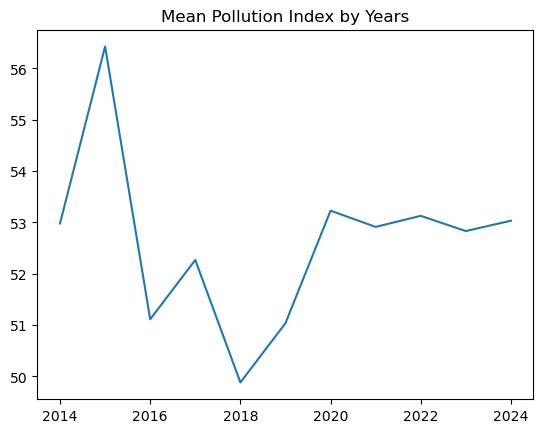

In [11]:
mean_pollution_index = df.groupby('Year')['Pollution Index'].mean()
plt.plot(mean_pollution_index)
plt.title('Mean Pollution Index by Years')
mean_pollution_index

Year
2014    64.785294
2015    61.981395
2016    92.650000
2017    72.091045
2018    79.716667
2019    71.278873
2020    59.753750
2021    53.243373
2022    55.883908
2023    61.971429
2024    61.582353
Name: Purchasing Power Index, dtype: float64

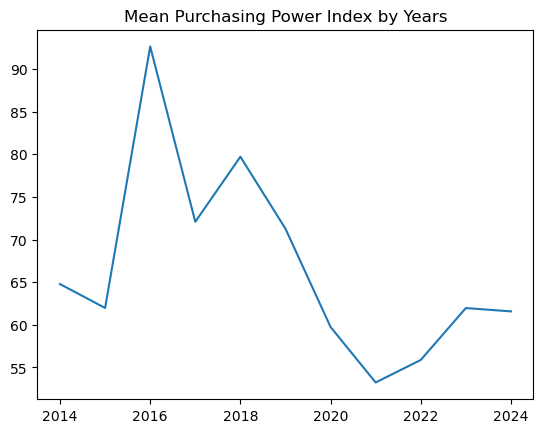

In [21]:
mean_power_index = df.groupby('Year')['Purchasing Power Index'].mean()
plt.plot(mean_power_index)
plt.title('Mean Purchasing Power Index by Years')
mean_power_index

Year
2014          NaN
2015          NaN
2016    56.594643
2017    51.708955
2018    77.721667
2019    77.130986
2020    77.350000
2021    77.600000
2022    78.322989
2023    77.789286
2024    78.172941
Name: Climate Index, dtype: float64

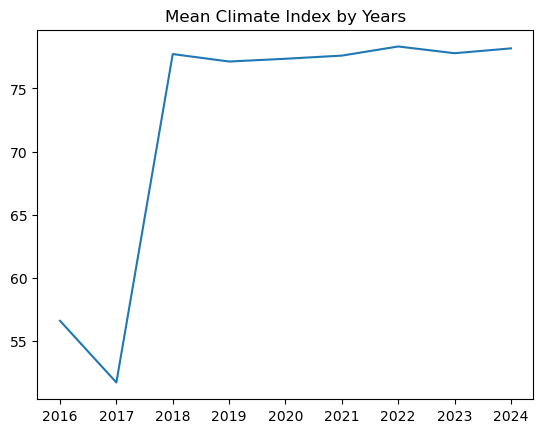

In [22]:
mean_climate_index = df.groupby('Year')['Climate Index'].mean()
plt.plot(mean_climate_index)
plt.title('Mean Climate Index by Years')
mean_climate_index

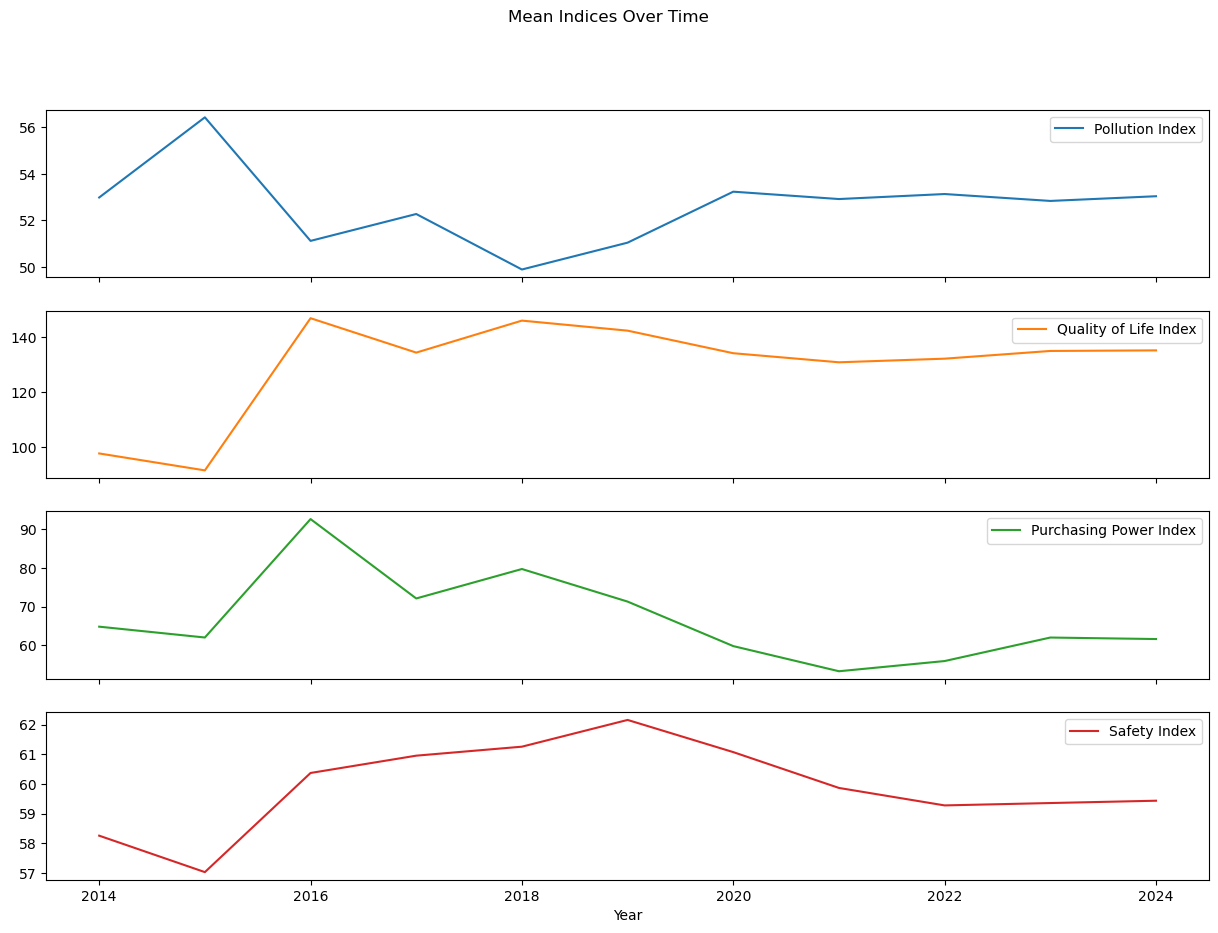

In [30]:
mean_by_year = df.groupby('Year')[['Pollution Index', 'Quality of Life Index', 'Purchasing Power Index', 'Safety Index']].mean()
mean_by_year.plot(figsize = (15,10),subplots = True, title = 'Mean Indices Over Time')
plt.show()


In [ ]:
indices_of_interest = ['Pollution Index', 'Quality of Life Index', 'Purchasing Power Index', 'Safety Index']

# Group data by country and year, and calculate mean values for selected indices
mean_by_country_year = df.groupby(['Country', 'Year'])[indices_of_interest].mean().reset_index()

# Iterate over each country and plot indices over time
for country in mean_by_country_year['Country'].unique():
    country_data = mean_by_country_year[mean_by_country_year['Country'] == country]
    
    # Plotting indices over time for the current country
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=True)
    axes = axes.flatten()

    for i, index in enumerate(indices_of_interest):
        axes[i].plot(country_data['Year'], country_data[index], marker='o', linestyle='-', label=index)
        axes[i].set_title(f'{index} in {country}')
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel(index)
        axes[i].grid(True)
        axes[i].legend()

    plt.tight_layout()
    plt.show()

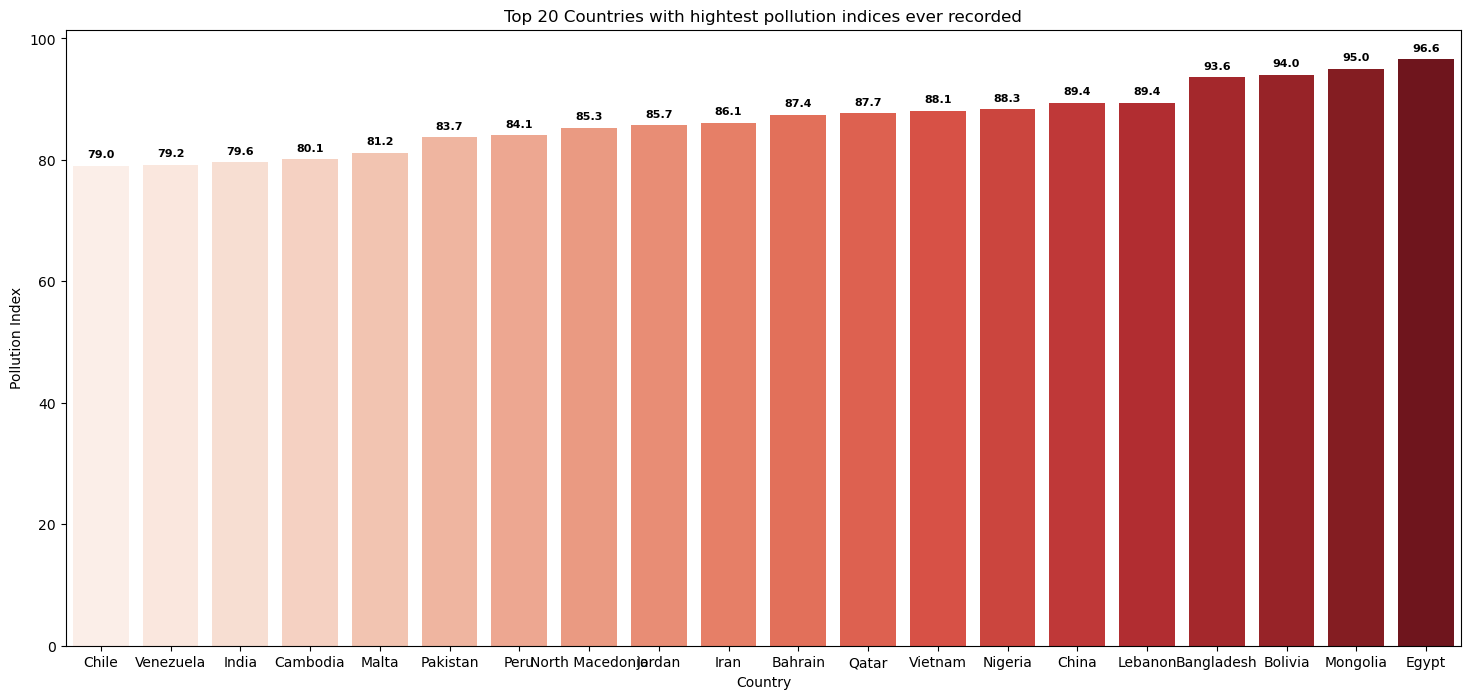

In [50]:
# top and bottom 20 polluted countries ever (among all years)

top_20_pollution = df.groupby('Country').max()['Pollution Index'].sort_values(ascending = False).head(20)
bottom_20_pollution = df.groupby('Country').max()['Pollution Index'].sort_values(ascending = True).head(20)

top_20_pollution = top_20_pollution.sort_values(ascending=True)
plt.figure(figsize=(18, 8))
sns.barplot(x=top_20_pollution.index, y=top_20_pollution.values, palette='Reds')
plt.ylabel('Pollution Index')
plt.xlabel('Country')
plt.title('Top 20 Countries with hightest pollution indices ever recorded')

for i, v in enumerate(top_20_pollution.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.show()


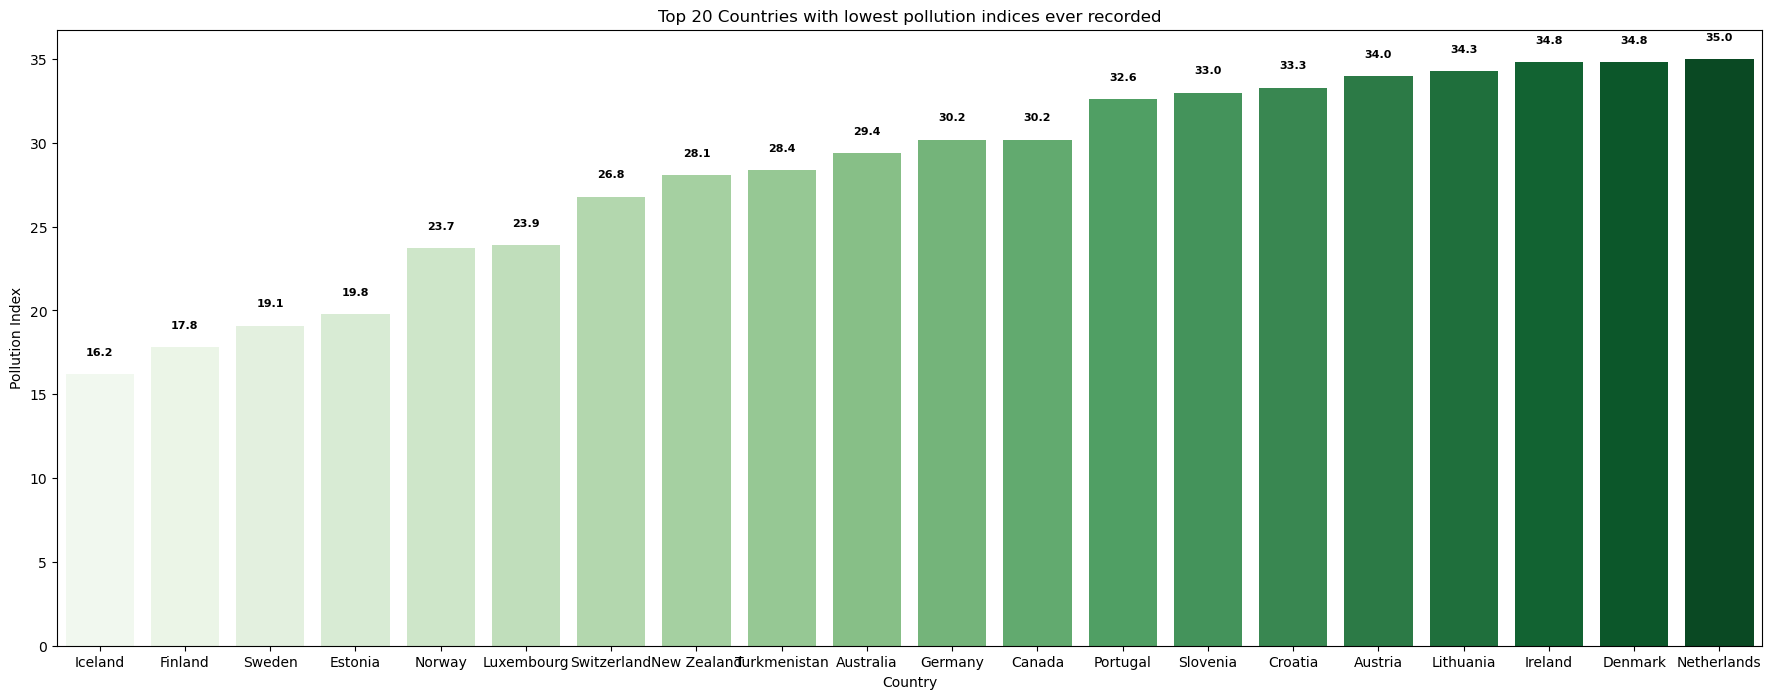

In [56]:
plt.figure(figsize=(22, 8))
sns.barplot(x=bottom_20_pollution.index, y=bottom_20_pollution.values, palette='Greens')
plt.ylabel('Pollution Index')
plt.xlabel('Country')
plt.title('Top 20 Countries with lowest pollution indices ever recorded')

for i, v in enumerate(bottom_20_pollution.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.show()


In [53]:
max_pollution_by_country = df.groupby('Country')['Pollution Index'].max()

most_polluted_country = max_pollution_by_country.idxmax()

most_polluted_country_data = df[df['Country'] == most_polluted_country]
max_pollution_index = most_polluted_country_data['Pollution Index'].max()
year_of_max_pollution = most_polluted_country_data[most_polluted_country_data['Pollution Index'] == max_pollution_index]['Year'].iloc[0]

min_pollution_by_country = df.groupby('Country')['Pollution Index'].min()
least_polluted_country = min_pollution_by_country.idxmin()
least_polluted_country_data = df[df['Country'] == least_polluted_country]
min_pollution_index = least_polluted_country_data['Pollution Index'].min()
year_of_min_pollution = least_polluted_country_data[least_polluted_country_data['Pollution Index'] == min_pollution_index]['Year'].iloc[0]


print(f"The country with the highest pollution index ever recorded is '{most_polluted_country}' with the index {max_pollution_index} in {year_of_max_pollution}")
print(f"The country with the lowest pollution index ever recorded is '{least_polluted_country}' with the index {min_pollution_index} in {year_of_min_pollution}")


The country with the highest pollution index ever recorded is 'Egypt' with the index 96.6 in 2015
The country with the lowest pollution index ever recorded is 'Finland' with the index 11.5 in 2020


#### Looking at 2023

In [65]:
# pollution index
df_2023 = df[df['Year'] == 2023]
top_5_pollution_2023 = df_2023.nlargest(5, 'Pollution Index').reset_index(drop=True)

print("Top 5 Countries with Highest Pollution Index in 2023:")
top_5_pollution_2023[['Country', 'Pollution Index']]

Top 5 Countries with Highest Pollution Index in 2023:


,Country,Pollution Index
0,Lebanon,89.4
1,Nigeria,88.0
2,Vietnam,85.1
3,Bangladesh,85.1
4,Egypt,83.2


In [67]:
bottom_5_pollution_2023 = df_2023.nsmallest(5, 'Pollution Index').reset_index(drop=True)

print("Bottom 5 Countries with Lowest Pollution Index in 2023:")
bottom_5_pollution_2023[['Country', 'Pollution Index']]

Bottom 5 Countries with Lowest Pollution Index in 2023:


,Country,Pollution Index
0,Finland,12.0
1,Iceland,15.2
2,Norway,17.7
3,Estonia,17.9
4,Sweden,18.0


In [62]:
# Quality of Life Index
top_5_quality_2023 = df_2023.nlargest(5, 'Quality of Life Index').reset_index(drop=True)

print("Top 5 Countries with Highest Quality of Life Index in 2023:")
top_5_quality_2023[['Country', 'Quality of Life Index']]

Top 5 Countries with Highest Quality of Life Index in 2023:


,Country,Quality of Life Index
0,Netherlands,196.7
1,Denmark,194.7
2,Switzerland,193.6
3,Luxembourg,192.9
4,Finland,190.5


In [61]:
bottom_5_quality_2023 = df_2023.nsmallest(5, 'Quality of Life Index').reset_index(drop=True)

# Display the bottom 5 countries with the lowest Quality of Life Index in 2023
print("Bottom 5 Countries with Lowest Quality of Life Index in 2023:")
bottom_5_quality_2023[['Country', 'Quality of Life Index']]

Bottom 5 Countries with Lowest Quality of Life Index in 2023:


,Country,Quality of Life Index
0,Nigeria,38.5
1,Bangladesh,70.1
2,Venezuela,72.6
3,Sri Lanka,72.8
4,Iran,73.8


In [63]:
# Top 10 Countries with Highest Mean Purchasing Power Index (Across all years)

mean_purchasing_power_by_country = df.groupby('Country')['Purchasing Power Index'].mean()

top_10_purchasing_power_countries = mean_purchasing_power_by_country.nlargest(10).reset_index()

print("Top 10 Countries with Highest Mean Purchasing Power Index:")
top_10_purchasing_power_countries[['Country', 'Purchasing Power Index']]

Top 10 Countries with Highest Mean Purchasing Power Index:


,Country,Purchasing Power Index
0,Switzerland,127.354545
1,Luxembourg,124.933333
2,United States,120.545455
3,Saudi Arabia,115.390909
4,Qatar,115.233333
5,Germany,113.236364
6,Australia,111.400000
7,United Arab Emirates,109.490909
8,Denmark,107.509091
9,Sweden,105.727273


In [64]:
# bottom 10
bottom_10_purchasing_power_countries = mean_purchasing_power_by_country.nsmallest(10).reset_index()

print("Bottom 10 Countries with Lowest Mean Purchasing Power Index:")
bottom_10_purchasing_power_countries[['Country', 'Purchasing Power Index']]

Bottom 10 Countries with Lowest Mean Purchasing Power Index:


,Country,Purchasing Power Index
0,Cambodia,11.900000
1,Venezuela,12.250000
2,Nigeria,15.100000
3,Sri Lanka,22.600000
4,Moldova,23.700000
5,Mongolia,24.550000
6,Egypt,24.590909
7,Armenia,27.700000
8,Tunisia,27.800000
9,Georgia,27.842857
